# Drug consumption
**dataset**: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

In [1]:
%matplotlib inline

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import math

In [3]:
inline_rc = dict(mpl.rcParams)

In [4]:
%config IPCompleter.greedy=True

# Data analysis

In [5]:
dataset = pd.read_csv("drug_consumption.data", names=["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

In [6]:
dataset = dataset.set_index("ID")

In [7]:
dataset.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
dataset.dtypes

Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [9]:
dataset.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


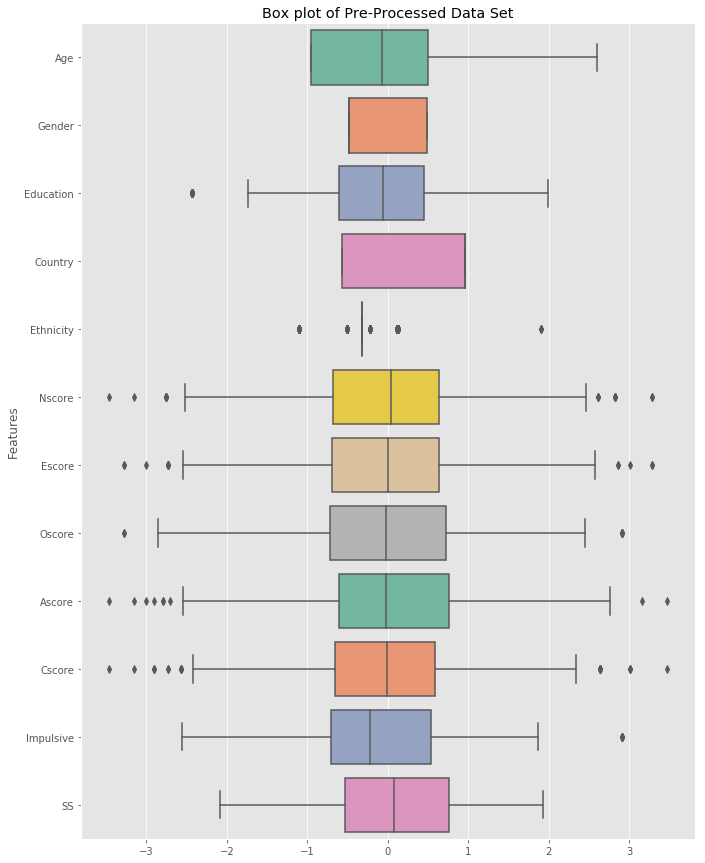

In [11]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(11,15))
plt.ylabel("Features")
plt.title("Box plot of Pre-Processed Data Set")
ax = sns.boxplot(data = dataset.iloc[:,:12], orient="h", palette="Set2")

In [ ]:
mpl.rcParams.update(inline_rc)

# Consider the drugs as target variables

Plotting features against each other

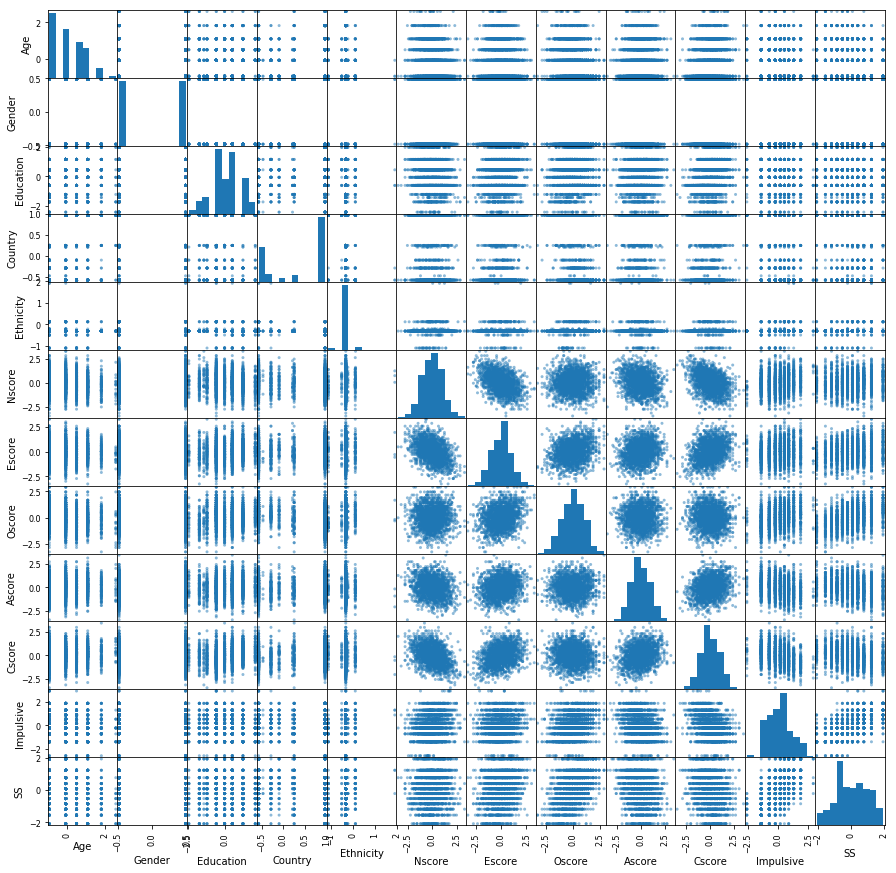

In [15]:
realations = pd.plotting.scatter_matrix(dataset.iloc[:, :12], figsize=(15,15))

Can't see much

Let's calculate Person correlations

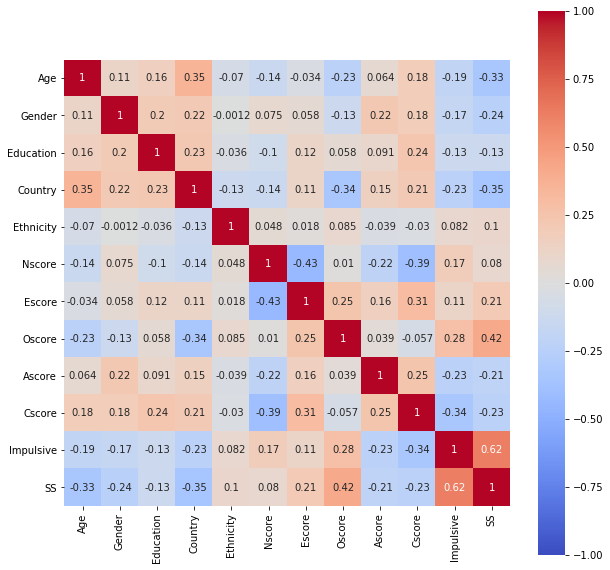

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("pearson"), vmin=-1, vmax=1, cmap="coolwarm", annot=True, square=True)

In [ ]:
spearman correlation

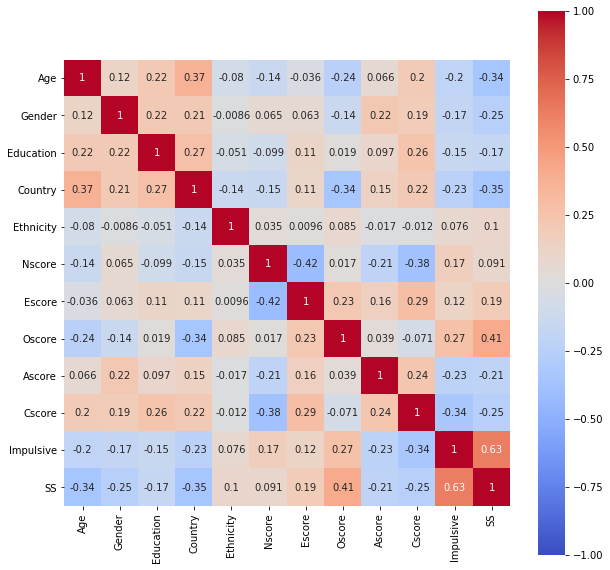

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("spearman"), vmin=-1, vmax=1, cmap="coolwarm", annot=True, square=True)

In [24]:
dataset.iloc[:,:12]

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
ID,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593


In [25]:
dataset.iloc[:,12:]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [26]:
dataset.isnull().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [51]:
2 // 6

0

In [21]:
len(dataset)

1885

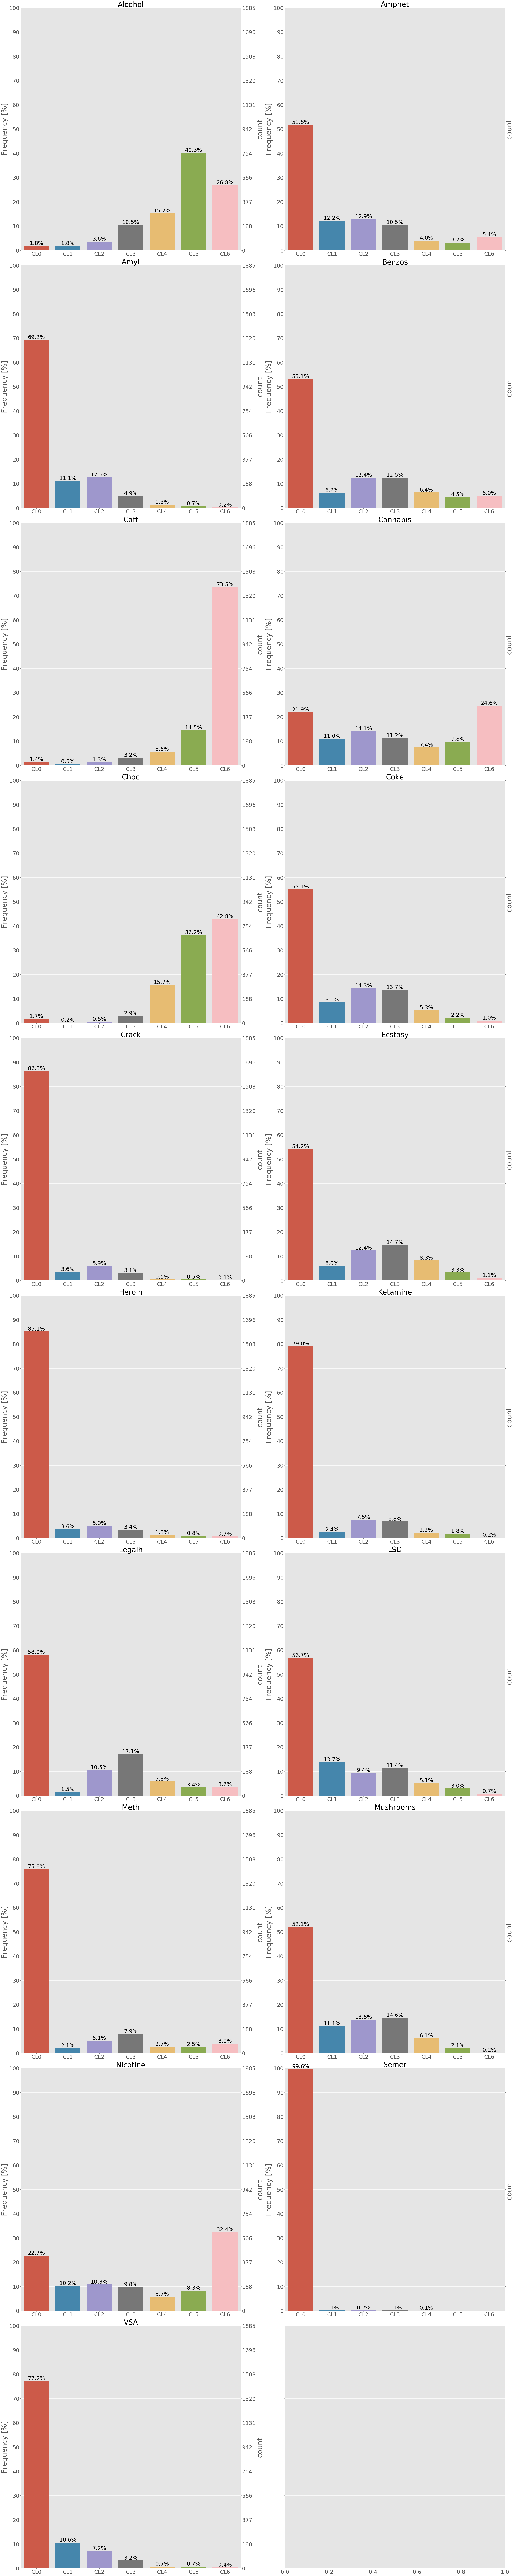

In [48]:
ncount = len(dataset)

ncols, nrows = 2, 10
plt.style.use('ggplot')
plt.rc('xtick', labelsize=30)
plt.rc('axes', labelsize=40)
fig, axes = plt.subplots(figsize=(20*ncols, 20*nrows), nrows=nrows, ncols=ncols, sharey=True)
for index, target in enumerate(dataset.columns[12:]):
    i, j = index // ncols, index % ncols
    ax = sns.countplot(data=dataset, x=target, ax=axes[i,j], order=["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"])
    
    
    
    ax2 = ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        if not math.isnan(x.mean()) and not math.isnan(y):
            ax.text(x.mean(), y, '{:.1f}%'.format(100.*y/ncount), fontproperties=mpl.font_manager.FontProperties(size=30), 
            ha='center', va='bottom')
    
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    ax.yaxis.set_tick_params(which="major", labelsize=30)
    
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax2.yaxis.set_tick_params(which="major", labelsize=30)

    ax2.grid(None)
    ax.set_xlabel("")
    ax.set_title(target, fontdict={'fontsize':40})
plt.tight_layout()

In [39]:
mpl.rcParams.update(inline_rc)

# This falls under the multioutput classifier category in scikit-learn [see here](https://scikit-learn.org/stable/modules/multiclass.html#multioutputclassifier)

> Multilabel classification support can be added to any classifier with MultiOutputClassifier. This strategy consists of fitting one classifier per target. This allows multiple target variable classifications. The purpose of this class is to extend estimators to be able to estimate a series of target functions (f1,f2,f3…,fn) that are trained on a single X predictor matrix to predict a series of responses (y1,y2,y3…,yn).

> This approach treats each label independently whereas multilabel classifiers may treat the multiple classes simultaneously, accounting for correlated behavior among them.

In [57]:
len(dataset.columns[12:])

19

In [38]:
Y

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])